In [1]:
from tempfile import template
!pip install Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.4 MB/s eta 0:00:00


In [10]:
from PIL import Image as PilImage

In [14]:
template = PilImage.open("assets/template.png")

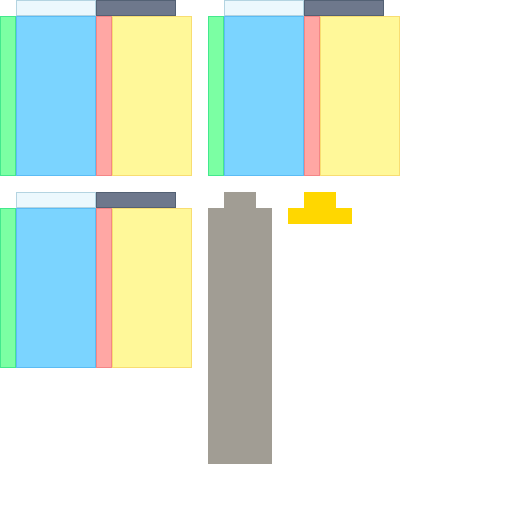

In [15]:
template

In [17]:
print(template.format, template.size, template.mode)

PNG (512, 512) RGBA


In [54]:
import os, sys, glob
!pip install iso3166

In [46]:
first_third_half_one=(224,16,304,176)
first_third_half_two=(320,16,400,176)
first_third_edge_one=(208,16,224,176)
first_third_edge_two=(304,16,320,176)
first_top_edge=(224,0,304,16)
first_bottom_edge=(304,0,384,16)

second_third_half_one=(16,208,96,368)
second_third_half_two=(112,208,192,368)
second_third_edge_one=(0,208,16,368)
second_third_edge_two=(96,208,112,368)
second_top_edge=(16,192,96,208)
second_bottom_edge=(96,192,176,208)

third_third_half_one=(16,16,96,176)
third_third_half_two=(112,16,192,176)
third_third_edge_one=(0,16,16,176)
third_third_edge_two=(96,16,112,176)
third_top_edge=(16,0,96,16)
third_bottom_edge=(96,0,176,16)

In [56]:
from IPython.display import display, Markdown
flags_done=[]
for infile in glob.glob("assets/flags/countries/*.png"):
    file, ext = os.path.splitext(infile)
    flagFile = PilImage.open(infile)
    newFlag = PilImage.new("RGBA",(512,512))
    newFlag.paste(template)
    flagWidth = flagFile.size[0]
    flagHeight = flagFile.size[1]
    flagThird = flagWidth/3
    flagSixteenth = flagWidth/16
    flagVerticalSixteenth = flagHeight/16
    firstThird = flagFile.crop((0,0,flagThird,flagHeight))
    secondThird = flagFile.crop((flagThird,0,flagThird*2,flagHeight))
    thirdThird = flagFile.crop((flagThird*2,0,flagThird*3,flagHeight))
    
    # First Third
    firstThirdHalfOne = firstThird.resize((first_third_half_one[2]-first_third_half_one[0],first_third_half_one[3]-first_third_half_one[1])).transpose(PilImage.Transpose.FLIP_LEFT_RIGHT)
    firstThirdHalfTwo = firstThird.resize((first_third_half_two[2]-first_third_half_two[0],first_third_half_two[3]-first_third_half_two[1]))
    newFlag.paste(firstThirdHalfOne, first_third_half_one)
    newFlag.paste(firstThirdHalfTwo, first_third_half_two)
    
    # Second Third
    secondThirdHalfOne = secondThird.resize((second_third_half_one[2]-second_third_half_one[0],second_third_half_one[3]-second_third_half_one[1])).transpose(PilImage.Transpose.FLIP_LEFT_RIGHT)
    secondThirdHalfTwo = secondThird.resize((second_third_half_two[2]-second_third_half_two[0],second_third_half_two[3]-second_third_half_two[1]))
    newFlag.paste(secondThirdHalfOne, second_third_half_one)
    newFlag.paste(secondThirdHalfTwo, second_third_half_two)
    
    # Third Third
    thirdThirdHalfOne = thirdThird.resize((third_third_half_one[2]-third_third_half_one[0],third_third_half_one[3]-third_third_half_one[1])).transpose(PilImage.Transpose.FLIP_LEFT_RIGHT)
    thirdThirdHalfTwo = thirdThird.resize((third_third_half_two[2]-third_third_half_two[0],third_third_half_two[3]-third_third_half_two[1]))
    newFlag.paste(thirdThirdHalfOne, third_third_half_one)
    newFlag.paste(thirdThirdHalfTwo, third_third_half_two)
    
    firstSixteenth = flagFile.crop((0,0,flagSixteenth,flagHeight))
    secondSixteenth = flagFile.crop((flagThird,0,flagThird,flagHeight))
    thirdSixteenth = flagFile.crop((flagThird*2,0,flagThird*2,flagHeight))
    firstSixteenthEdge = firstSixteenth.resize((first_third_edge_one[2]-first_third_edge_one[0],first_third_edge_one[3]-first_third_edge_one[1]))
    secondSixteenthEdge = secondSixteenth.resize((second_third_edge_one[2]-second_third_edge_one[0],second_third_edge_one[3]-second_third_edge_one[1]))
    thirdSixteenthEdge = thirdSixteenth.resize((third_third_edge_one[2]-third_third_edge_one[0],third_third_edge_one[3]-third_third_edge_one[1]))
    finalSixteenth = flagFile.crop((flagWidth-flagSixteenth,0,flagWidth,flagHeight))
    finalSixteenthEdge = finalSixteenth.resize((third_third_edge_one[2]-third_third_edge_one[0],third_third_edge_one[3]-third_third_edge_one[1]))
    
    # first third edge
    
    newFlag.paste(firstSixteenthEdge, first_third_edge_two)
    newFlag.paste(secondSixteenthEdge, first_third_edge_one)
    
    # second third edge
    
    
    newFlag.paste(secondSixteenthEdge, second_third_edge_two)
    newFlag.paste(thirdSixteenthEdge, second_third_edge_one)
    
    # third third edge
    
    
    newFlag.paste(thirdSixteenthEdge, third_third_edge_two)
    newFlag.paste(finalSixteenthEdge, third_third_edge_one)
    
    # first top edge
    firstVerticalSixteenth = flagFile.crop((0,0,flagThird,flagVerticalSixteenth))
    firstVerticalSixteenthEdge = firstVerticalSixteenth.resize((first_top_edge[2]-first_top_edge[0],first_top_edge[3]-first_top_edge[1])).transpose(PilImage.Transpose.ROTATE_180)
    newFlag.paste(firstVerticalSixteenthEdge, first_top_edge)
    
    # first bottom edge
    firstVerticalSixteenth = flagFile.crop((0,flagHeight-flagVerticalSixteenth,flagThird,flagHeight))
    firstVerticalSixteenthEdge = firstVerticalSixteenth.resize((first_bottom_edge[2]-first_bottom_edge[0],first_bottom_edge[3]-first_bottom_edge[1])).transpose(PilImage.Transpose.ROTATE_180)
    newFlag.paste(firstVerticalSixteenthEdge, first_bottom_edge)
    
    # second top edge
    secondVerticalSixteenth = flagFile.crop((flagThird,0,flagThird*2,flagVerticalSixteenth))
    secondVerticalSixteenthEdge = secondVerticalSixteenth.resize((second_top_edge[2]-second_top_edge[0],second_top_edge[3]-second_top_edge[1])).transpose(PilImage.Transpose.ROTATE_180)
    newFlag.paste(secondVerticalSixteenthEdge, second_top_edge)
    
    # second bottom edge
    secondVerticalSixteenth = flagFile.crop((flagThird,flagHeight-flagVerticalSixteenth,flagThird*2,flagHeight))
    secondVerticalSixteenthEdge = secondVerticalSixteenth.resize((second_bottom_edge[2]-second_bottom_edge[0],second_bottom_edge[3]-second_bottom_edge[1])).transpose(PilImage.Transpose.ROTATE_180)
    newFlag.paste(secondVerticalSixteenthEdge, second_bottom_edge)
    
    # third top edge
    thirdVerticalSixteenth = flagFile.crop((flagThird*2,0,flagThird*3,flagVerticalSixteenth))
    thirdVerticalSixteenthEdge = thirdVerticalSixteenth.resize((third_top_edge[2]-third_top_edge[0],third_top_edge[3]-third_top_edge[1])).transpose(PilImage.Transpose.ROTATE_180)
    newFlag.paste(thirdVerticalSixteenthEdge, third_top_edge)
    
    # third bottom edge
    thirdVerticalSixteenth = flagFile.crop((flagThird*2,flagHeight-flagVerticalSixteenth,flagThird*3,flagHeight))
    thirdVerticalSixteenthEdge = thirdVerticalSixteenth.resize((third_bottom_edge[2]-third_bottom_edge[0],third_bottom_edge[3]-third_bottom_edge[1])).transpose(PilImage.Transpose.ROTATE_180)
    newFlag.paste(thirdVerticalSixteenthEdge, third_bottom_edge)
    
    newFlag.save(f"src/main/resources/assets/bratacha/textures/block/countries/{os.path.basename(file)}.png")
    flags_done.append(os.path.basename(file))


print("Saved all flags")


Saved all flags


In [69]:
from iso3166 import countries
import re

for flag in flags_done:
    country = countries.get(flag).apolitical_name
    #Make variable name removing all special characters and replacing space with _
    variable_name = re.sub(r'[^a-zA-Z0-9 ]+', '', country).replace(" ", "_")
    variable_name=variable_name.upper()
    print('''
    public static final DeferredBlock<FlagBlock> FLAG_COUNTRY_{0}_BLOCK = BLOCKS.register("flag_country_{1}", () -> new FlagBlock(ResourceLocation.fromNamespaceAndPath(BratachaMod.MODID,"countries/{1}"),BlockBehaviour.Properties.of().strength(3.5f).requiresCorrectToolForDrops().sound(SoundType.ANVIL).noOcclusion()));
    public static final DeferredItem<Item> FLAG_COUNTRY_{0}_BLOCK_ITEM = ITEMS.register("flag_country_{1}", () -> new BlockItem(FLAG_COUNTRY_{0}_BLOCK.get(), new Item.Properties()));
    '''.format(variable_name,flag.lower()))


    public static final DeferredBlock<FlagBlock> FLAG_COUNTRY_TOGO_BLOCK = BLOCKS.register("flag_country_tg", () -> new FlagBlock(ResourceLocation.fromNamespaceAndPath(BratachaMod.MODID,"countries/tg"),BlockBehaviour.Properties.of().strength(3.5f).requiresCorrectToolForDrops().sound(SoundType.ANVIL).noOcclusion()));
    public static final DeferredItem<Item> FLAG_COUNTRY_TOGO_BLOCK_ITEM = ITEMS.register("flag_country_tg", () -> new BlockItem(FLAG_COUNTRY_TOGO_BLOCK.get(), new Item.Properties()));
    

    public static final DeferredBlock<FlagBlock> FLAG_COUNTRY_MONTENEGRO_BLOCK = BLOCKS.register("flag_country_me", () -> new FlagBlock(ResourceLocation.fromNamespaceAndPath(BratachaMod.MODID,"countries/me"),BlockBehaviour.Properties.of().strength(3.5f).requiresCorrectToolForDrops().sound(SoundType.ANVIL).noOcclusion()));
    public static final DeferredItem<Item> FLAG_COUNTRY_MONTENEGRO_BLOCK_ITEM = ITEMS.register("flag_country_me", () -> new BlockItem(FLAG_COUNTRY_MONTENEGRO_BLOCK.get

In [76]:
input=""
for flag in flags_done:
    country = countries.get(flag).apolitical_name
    #Make variable name removing all special characters and replacing space with _
    variable_name = re.sub(r'[^a-zA-Z0-9 ]+', '', country).replace(" ", "_")
    variable_name=variable_name.upper()
    input=input+'''    FLAG_COUNTRY_{0}_BLOCK.get(),
    '''.format(variable_name)
input = input[:-6]
print(input)

    FLAG_COUNTRY_TOGO_BLOCK.get(),
        FLAG_COUNTRY_MONTENEGRO_BLOCK.get(),
        FLAG_COUNTRY_LAO_PEOPLES_DEMOCRATIC_REPUBLIC_BLOCK.get(),
        FLAG_COUNTRY_MAURITANIA_BLOCK.get(),
        FLAG_COUNTRY_NICARAGUA_BLOCK.get(),
        FLAG_COUNTRY_LATVIA_BLOCK.get(),
        FLAG_COUNTRY_OMAN_BLOCK.get(),
        FLAG_COUNTRY_AFGHANISTAN_BLOCK.get(),
        FLAG_COUNTRY_CYPRUS_BLOCK.get(),
        FLAG_COUNTRY_BENIN_BLOCK.get(),
        FLAG_COUNTRY_ANTARCTICA_BLOCK.get(),
        FLAG_COUNTRY_CHINA_BLOCK.get(),
        FLAG_COUNTRY_COLOMBIA_BLOCK.get(),
        FLAG_COUNTRY_CHRISTMAS_ISLAND_BLOCK.get(),
        FLAG_COUNTRY_ANTIGUA_AND_BARBUDA_BLOCK.get(),
        FLAG_COUNTRY_MONTSERRAT_BLOCK.get(),
        FLAG_COUNTRY_MOLDOVA_REPUBLIC_OF_BLOCK.get(),
        FLAG_COUNTRY_ZAMBIA_BLOCK.get(),
        FLAG_COUNTRY_VIET_NAM_BLOCK.get(),
        FLAG_COUNTRY_FRENCH_SOUTHERN_TERRITORIES_BLOCK.get(),
        FLAG_COUNTRY_CHAD_BLOCK.get(),
        FLAG_COUNTRY_MAYOTTE_BLOCK.get(),

In [77]:
for flag in flags_done:
    country = countries.get(flag).apolitical_name
    #Make variable name removing all special characters and replacing space with _
    variable_name = re.sub(r'[^a-zA-Z0-9 ]+', '', country).replace(" ", "_")
    variable_name=variable_name.upper()
    print("add(Registration.FLAG_COUNTRY_{0}_BLOCK.get(),\"Flag of {1}\");".format(variable_name,country))

add(Registration.FLAG_COUNTRY_TOGO_BLOCK.get(),"Flag of Togo");
add(Registration.FLAG_COUNTRY_MONTENEGRO_BLOCK.get(),"Flag of Montenegro");
add(Registration.FLAG_COUNTRY_LAO_PEOPLES_DEMOCRATIC_REPUBLIC_BLOCK.get(),"Flag of Lao People's Democratic Republic");
add(Registration.FLAG_COUNTRY_MAURITANIA_BLOCK.get(),"Flag of Mauritania");
add(Registration.FLAG_COUNTRY_NICARAGUA_BLOCK.get(),"Flag of Nicaragua");
add(Registration.FLAG_COUNTRY_LATVIA_BLOCK.get(),"Flag of Latvia");
add(Registration.FLAG_COUNTRY_OMAN_BLOCK.get(),"Flag of Oman");
add(Registration.FLAG_COUNTRY_AFGHANISTAN_BLOCK.get(),"Flag of Afghanistan");
add(Registration.FLAG_COUNTRY_CYPRUS_BLOCK.get(),"Flag of Cyprus");
add(Registration.FLAG_COUNTRY_BENIN_BLOCK.get(),"Flag of Benin");
add(Registration.FLAG_COUNTRY_ANTARCTICA_BLOCK.get(),"Flag of Antarctica");
add(Registration.FLAG_COUNTRY_CHINA_BLOCK.get(),"Flag of China");
add(Registration.FLAG_COUNTRY_COLOMBIA_BLOCK.get(),"Flag of Colombia");
add(Registration.FLAG_COUNTRY_CHR

In [78]:
for infile in glob.glob("assets/flags/countries/*.png"):
    file, ext = os.path.splitext(infile)
    flagFile = PilImage.open(infile)
    newFlag = PilImage.new("RGBA",(16,16))
    newFlag.paste(flagFile.resize((16,16)))
    newFlag.save(f"src/main/resources/assets/bratacha/textures/item/countries/{os.path.basename(file)}.png")
    flag = os.path.basename(file)
    country = countries.get(flag).apolitical_name
    #Make variable name removing all special characters and replacing space with _
    variable_name = re.sub(r'[^a-zA-Z0-9 ]+', '', country).replace(" ", "_")
    variable_name=variable_name.upper()
    print("withExistingParent(Registration.FLAG_COUNTRY_{0}_BLOCK_ITEM.getId().getPath(),mcLoc(\"item/generated\")).texture(\"layer0\",\"item/countries/{1}\");".format(variable_name,os.path.basename(file)))

withExistingParent(Registration.FLAG_COUNTRY_TOGO_BLOCK_ITEM.getId().getPath(),mcLoc("item/generated")).texture("layer0","item/countries/tg");
withExistingParent(Registration.FLAG_COUNTRY_MONTENEGRO_BLOCK_ITEM.getId().getPath(),mcLoc("item/generated")).texture("layer0","item/countries/me");
withExistingParent(Registration.FLAG_COUNTRY_LAO_PEOPLES_DEMOCRATIC_REPUBLIC_BLOCK_ITEM.getId().getPath(),mcLoc("item/generated")).texture("layer0","item/countries/la");
withExistingParent(Registration.FLAG_COUNTRY_MAURITANIA_BLOCK_ITEM.getId().getPath(),mcLoc("item/generated")).texture("layer0","item/countries/mr");
withExistingParent(Registration.FLAG_COUNTRY_NICARAGUA_BLOCK_ITEM.getId().getPath(),mcLoc("item/generated")).texture("layer0","item/countries/ni");
withExistingParent(Registration.FLAG_COUNTRY_LATVIA_BLOCK_ITEM.getId().getPath(),mcLoc("item/generated")).texture("layer0","item/countries/lv");
withExistingParent(Registration.FLAG_COUNTRY_OMAN_BLOCK_ITEM.getId().getPath(),mcLoc("item/gener

In [79]:
for flag in flags_done:
    country = countries.get(flag).apolitical_name
    #Make variable name removing all special characters and replacing space with _
    variable_name = re.sub(r'[^a-zA-Z0-9 ]+', '', country).replace(" ", "_")
    variable_name=variable_name.upper()
    print("event.accept(FLAG_COUNTRY_{0}_BLOCK_ITEM.get());".format(variable_name))

event.accept(FLAG_COUNTRY_TOGO_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_MONTENEGRO_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_LAO_PEOPLES_DEMOCRATIC_REPUBLIC_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_MAURITANIA_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_NICARAGUA_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_LATVIA_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_OMAN_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_AFGHANISTAN_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_CYPRUS_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_BENIN_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_ANTARCTICA_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_CHINA_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_COLOMBIA_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_CHRISTMAS_ISLAND_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_ANTIGUA_AND_BARBUDA_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_MONTSERRAT_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_MOLDOVA_REPUBLIC_OF_BLOCK_ITEM.get());
event.accept(FLAG_COUNTRY_ZAMBIA_BL